<a href="https://colab.research.google.com/github/parsag76/UVic/blob/main/Maps_Projected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install update xarray 
!pip install cmocean 
! pip install netcdf4
! pip install cftime
! pip install hdf5

# !  pip install nc-time-axis
# ! pip install wget
! pip install matplotlib
# ! pip install intake
! pip  install zarr
! pip install dask
! pip install tqdm
! pip install nc_time_axis
# ! pip install cmip6_preprocessing
# ! pip install gcsfs
# ! apt-get -qq install python-cartopy python3-cartopy
# ! python -m pip install intake-esm
# ! conda install -c conda-forge xesmf esmpy=7.1.0 --y
# ! pip install --upgrade git+https://github.com/JiaweiZhuang/xESMF.git@area



In [ ]:
! conda install -c conda-forge cartopy --y

In [ ]:
%matplotlib inline
import numpy as np
# import gcsfs
import pandas as pd
import xarray as xr
import warnings
import matplotlib.pyplot as plt
# import intake_esm
# import cartopy
# from cartopy import util
# import cartopy.crs as ccrs
import zarr
import dask.array as da  
from dask.diagnostics import ProgressBar
from tqdm.autonotebook import tqdm
import nc_time_axis
import time
# import xesmf as xe
# import cmip6_preprocessing
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from ipykernel import kernelapp as app


In [ ]:
sec_2_yr = 60*60*24*365
kg_2_mol = 1000./12.
kgs_2_pgyr = sec_2_yr / 1e12

# 3 SMILES

In [ ]:
# CanESM5_dict={}

# CanESM5_dict['historical'] = xr.load_dataset('CanESM5_fgco2_anoms_historical.nc').fgco2

# CanESM5_dict['ssp126'] = {}
# CanESM5_dict['ssp126']['mid_century'] = xr.load_dataset('CanESM5_fgco2_anoms_ssp126_mid_century.nc').fgco2
# CanESM5_dict['ssp126']['late_century'] = xr.load_dataset('CanESM5_fgco2_anoms_ssp126_late_century.nc').fgco2



# CanESM5_dict['ssp245']= {}
# CanESM5_dict['ssp245']['mid_century'] = xr.load_dataset('CanESM5_fgco2_anoms_ssp245_mid_century.nc').fgco2
# CanESM5_dict['ssp245']['late_century'] = xr.load_dataset('CanESM5_fgco2_anoms_ssp245_late_century.nc').fgco2

# CanESM5_dict['ssp585']= {}
# CanESM5_dict['ssp585']['mid_century'] = xr.load_dataset('CanESM5_fgco2_anoms_ssp585_mid_century.nc').fgco2
# CanESM5_dict['ssp585']['late_century'] = xr.load_dataset('CanESM5_fgco2_anoms_ssp585_late_century.nc').fgco2


# CanESM5 = xr.load_dataset('CanESM5_fgco2_historical_base.nc').fgco2
# IPSL = xr.load_dataset('IPSL_fgco2_historical_base.nc').fgco2
# NorCPM = xr.load_dataset('NorCPM1_fgco2_historical_base.nc').fgco2



fgco2_anoms = {}

fgco2_anoms['historical'] = xr.load_dataset('fgco2_anoms_historical.nc').fgco2

fgco2_anoms['ssp126'] = {}
fgco2_anoms['ssp126']['mid_century'] = xr.load_dataset('fgco2_anoms_ssp126_mid_century.nc').fgco2
fgco2_anoms['ssp126']['late_century'] = xr.load_dataset('fgco2_anoms_ssp126_late_century.nc').fgco2


fgco2_anoms['ssp245']= {}
fgco2_anoms['ssp245']['mid_century'] = xr.load_dataset('fgco2_anoms_ssp245_mid_century.nc').fgco2
fgco2_anoms['ssp245']['late_century'] = xr.load_dataset('fgco2_anoms_ssp245_late_century.nc').fgco2

fgco2_anoms['ssp585']= {}
fgco2_anoms['ssp585']['mid_century'] = xr.load_dataset('fgco2_anoms_ssp585_mid_century.nc').fgco2
fgco2_anoms['ssp585']['late_century'] = xr.load_dataset('fgco2_anoms_ssp585_late_century.nc').fgco2

In [ ]:
fgco2_anoms['ssp585']['mid_century'].source_id

<xarray.DataArray 'source_id' (source_id: 12)>
array(['GFDL-ESM4', 'GFDL-CM4', 'CanESM5', 'INM-CM4-8', 'MPI-ESM1-2-LR',
       'MPI-ESM1-2-HR', 'INM-CM5-0', 'CESM2-WACCM', 'IPSL-CM6A-LR',
       'NorESM2-MM', 'NorESM2-LM', 'ACCESS-ESM1-5'], dtype=object)
Coordinates:
  * source_id  (source_id) object 'GFDL-ESM4' 'GFDL-CM4' ... 'ACCESS-ESM1-5'

In [ ]:
# models = np.concatenate([fgco2_anoms['historical'].source_id.values,fgco2_anoms['ssp126']['mid_century'].source_id.values,fgco2_anoms['ssp585']['mid_century'].source_id.values,fgco2_anoms['ssp245']['mid_century'].source_id.values])
# for mod in models:
#     if mod not in fgco2_anoms['historical'].source_id.values:
#         try:
#             fgco2_anoms['ssp126']['mid_century'] = fgco2_anoms['ssp126']['mid_century'].drop_sel(source_id = mod)
#             fgco2_anoms['ssp126']['late_century'] = fgco2_anoms['ssp126']['late_century'].drop_sel(source_id = mod)
#         except:
#             pass
#         try:
#             fgco2_anoms['ssp245']['mid_century'] = fgco2_anoms['ssp245']['mid_century'].drop_sel(source_id = mod)
#             fgco2_anoms['ssp245']['late_century'] = fgco2_anoms['ssp245']['late_century'].drop_sel(source_id = mod)
#         except:
#             pass
#         try:
#             fgco2_anoms['ssp585']['mid_century'] = fgco2_anoms['ssp585']['mid_century'].drop_sel(source_id = mod)
#             fgco2_anoms['ssp585']['late_century'] = fgco2_anoms['ssp585']['late_century'].drop_sel(source_id = mod)
#         except:
#             pass
#     elif mod not in fgco2_anoms['ssp126']['mid_century'].source_id.values :
        
#         try:
#             fgco2_anoms['historical'] = fgco2_anoms['historical'].drop_sel(source_id = mod)
#         except:
#             pass
#         try:
#             fgco2_anoms['ssp245']['mid_century'] = fgco2_anoms['ssp245']['mid_century'].drop_sel(source_id = mod)
#             fgco2_anoms['ssp245']['late_century'] = fgco2_anoms['ssp245']['late_century'].drop_sel(source_id = mod)
#         except:
#             pass
#         try:
#             fgco2_anoms['ssp585']['mid_century'] = fgco2_anoms['ssp585']['mid_century'].drop_sel(source_id = mod)
#             fgco2_anoms['ssp585']['late_century'] = fgco2_anoms['ssp585']['late_century'].drop_sel(source_id = mod)
#         except:
#             pass
        
#     elif mod not in fgco2_anoms['ssp245']['mid_century'].source_id.values :
#         try:
#             fgco2_anoms['historical'] = fgco2_anoms['historical'].drop_sel(source_id = mod)
#         except:
#             pass
#         try:
#             fgco2_anoms['ssp126']['mid_century'] = fgco2_anoms['ssp126']['mid_century'].drop_sel(source_id = mod)
#             fgco2_anoms['ssp126']['late_century'] = fgco2_anoms['ssp126']['late_century'].drop_sel(source_id = mod)
#         except:
#             pass
#         try:
#             fgco2_anoms['ssp585']['mid_century'] = fgco2_anoms['ssp585']['mid_century'].drop_sel(source_id = mod)
#             fgco2_anoms['ssp585']['late_century'] = fgco2_anoms['ssp585']['late_century'].drop_sel(source_id = mod)
#         except:
#             pass
        
        
#     elif mod not in fgco2_anoms['ssp585']['mid_century'].source_id.values:

#         try:
#             fgco2_anoms['historical'] = fgco2_anoms['historical'].drop_sel(source_id = mod)
#         except:
#             pass
#         try:
#             fgco2_anoms['ssp126']['mid_century'] = fgco2_anoms['ssp126']['mid_century'].drop_sel(source_id = mod)
#             fgco2_anoms['ssp126']['late_century'] = fgco2_anoms['ssp126']['late_century'].drop_sel(source_id = mod)
#         except:
#             pass
#         try:
#             fgco2_anoms['ssp245']['mid_century'] = fgco2_anoms['ssp245']['mid_century'].drop_sel(source_id = mod)
#             fgco2_anoms['ssp245']['late_century'] = fgco2_anoms['ssp245']['late_century'].drop_sel(source_id = mod)
#         except:
#             pass

                

In [ ]:
def corr(A,B):

    HIV = A.values.flatten()
    HMV = B.values.flatten()

    HMV = HMV[~np.isnan(HIV)]
    HIV = HIV[~np.isnan(HIV)]
    
    HIV = HIV[~np.isnan(HMV)]
    HMV = HMV[~np.isnan(HMV)]

    return np.corrcoef(HMV,HIV)[0,1]

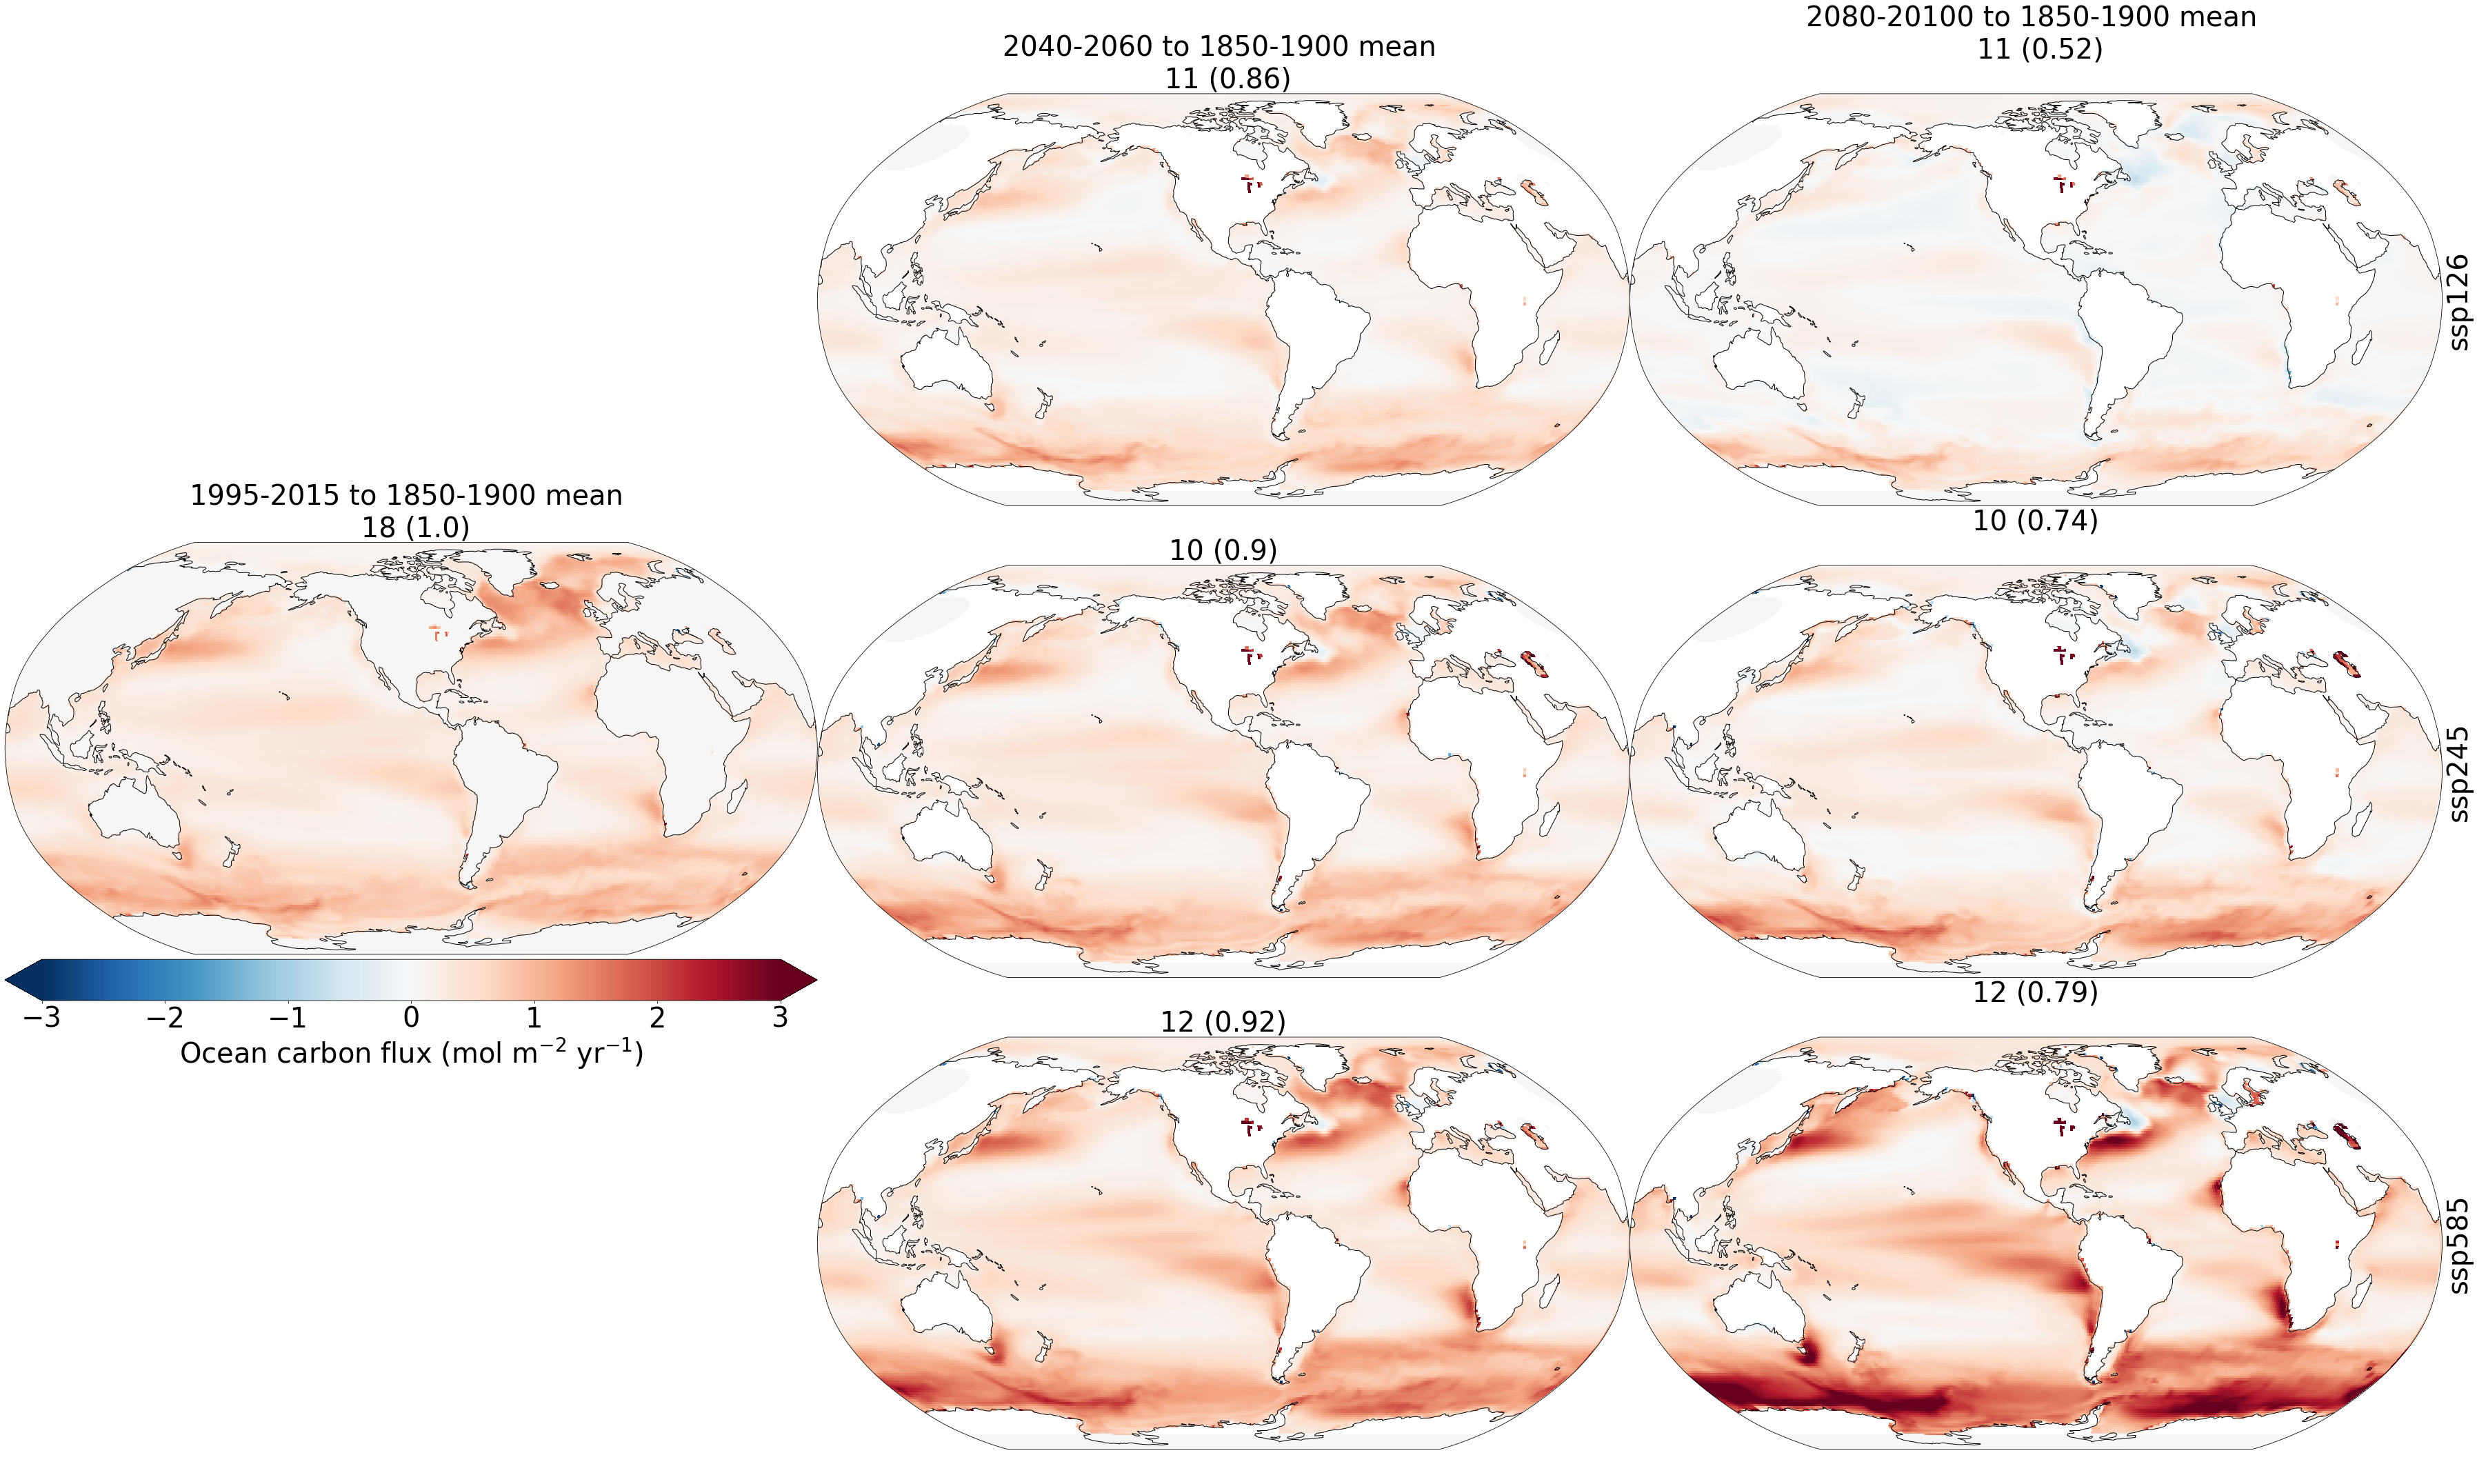

In [ ]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig= plt.figure(figsize=(50,30))



ax = plt.subplot(3,3,4, projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['historical'].mean(dim='source_id')*kg_2_mol*sec_2_yr
n = fgco2_anoms['historical'].source_id.shape[0]
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
cr = corr(fgco2_anoms['historical'].mean(dim='source_id'), fgco2_anoms['historical'].mean(dim='source_id'))
ax.set_title(f'1995-2015 to 1850-1900 mean \n {n} ({round(cr,2)})', fontsize=40, pad = 0.5)
divider = make_axes_locatable(ax)
ax_cb = divider.append_axes('bottom', size="10%", pad=0.1, axes_class=plt.Axes)
cbar=plt.colorbar(cb, cax=ax_cb, orientation="horizontal", extend = 'both')
cbar.set_label(label=r'Ocean carbon flux (mol m$^{-2}$ yr$^{-1}$)', size=40)
cbar.ax.tick_params(labelsize=40)


ax = plt.subplot(3,3,2, projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp126']['mid_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
n = fgco2_anoms['ssp126']['mid_century'].source_id.shape[0]
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
cr = corr(fgco2_anoms['ssp126']['mid_century'].mean(dim='source_id'), fgco2_anoms['historical'].mean(dim='source_id'))
ax.set_title(f'2040-2060 to 1850-1900 mean \n {n} ({round(cr,2)})', fontsize=40, pad = 0.5)
_=ax.coastlines()
divider = make_axes_locatable(ax)
# ax_cb = divider.append_axes('bottom', size="3%", pad=0.1, axes_class=plt.Axes)
# _=plt.colorbar(cb, cax=ax_cb, orientation="horizontal", label=r'Ocean carbon flux (mol m$^{-2}$ yr$^{-1}$)')



ax = plt.subplot(3,3,3, projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp126']['late_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
n = fgco2_anoms['ssp126']['late_century'].source_id.shape[0]
cr = corr(fgco2_anoms['ssp126']['late_century'].mean(dim='source_id'), fgco2_anoms['historical'].mean(dim='source_id'))
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
ax.set_title(f'2080-20100 to 1850-1900 mean \n {n} ({round(cr,2)})', fontsize=40, pad = 0.5)
_=ax.coastlines()
divider = make_axes_locatable(ax)
# ax_cb = divider.append_axes('bottom', size="3%", pad=0.1, axes_class=plt.Axes)
# _=plt.colorbar(cb, cax=ax_cb, orientation="horizontal", label=r'Ocean carbon flux (mol m$^{-2}$ yr$^{-1}$)')
ax2 = ax.twinx()
ax2.set_ylabel('ssp126',rotation=90, fontsize=40)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.get_yaxis().set_ticks([])

ax = plt.subplot(3,3,5, projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp245']['mid_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
n = fgco2_anoms['ssp245']['mid_century'].source_id.shape[0]
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
divider = make_axes_locatable(ax)
cr = corr(fgco2_anoms['ssp245']['mid_century'].mean(dim='source_id'), fgco2_anoms['historical'].mean(dim='source_id'))
ax.set_title(f'{n} ({round(cr,2)})', fontsize=40, pad = 0.5)
# ax_cb = divider.append_axes('bottom', size="3%", pad=0.1, axes_class=plt.Axes)
# _=plt.colorbar(cb, cax=ax_cb, orientation="horizontal", label=r'Ocean carbon flux (mol m$^{-2}$ yr$^{-1}$)')
_=ax.coastlines()

ax = plt.subplot(3,3,6, projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp245']['late_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
n = fgco2_anoms['ssp245']['late_century'].source_id.shape[0]
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
cr = corr(fgco2_anoms['ssp245']['late_century'].mean(dim='source_id'), fgco2_anoms['historical'].mean(dim='source_id'))
ax.set_title(f'{n} ({round(cr,2)})', fontsize=40, pad = 0.5)
divider = make_axes_locatable(ax)
# ax_cb = divider.append_axes('bottom', size="3%", pad=0.1, axes_class=plt.Axes)
# _=plt.colorbar(cb, cax=ax_cb, orientation="horizontal", label=r'Ocean carbon flux (mol m$^{-2}$ yr$^{-1}$)')
ax2 = ax.twinx()
ax2.set_ylabel('ssp245',rotation=90, fontsize=40)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.get_yaxis().set_ticks([])


ax = plt.subplot(3,3,8, projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp585']['mid_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
n = fgco2_anoms['ssp585']['mid_century'].source_id.shape[0]
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
divider = make_axes_locatable(ax)
cr = corr(fgco2_anoms['ssp585']['mid_century'].mean(dim='source_id'), fgco2_anoms['historical'].mean(dim='source_id'))
ax.set_title(f'{n} ({round(cr,2)})', fontsize=40, pad = 0.5)
# ax_cb = divider.append_axes('bottom', size="3%", pad=0.1, axes_class=plt.Axes)
# _=plt.colorbar(cb, cax=ax_cb, orientation="horizontal", label=r'Ocean carbon flux (mol m$^{-2}$ yr$^{-1}$)')
_=ax.coastlines()

ax = plt.subplot(3,3,9, projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp585']['late_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
n = fgco2_anoms['ssp585']['late_century'].source_id.shape[0]
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
divider = make_axes_locatable(ax)
cr = corr(fgco2_anoms['ssp585']['late_century'].mean(dim='source_id'), fgco2_anoms['historical'].mean(dim='source_id'))
ax.set_title(f'{n} ({round(cr,2)})', fontsize=40, pad = 0.5)
# ax_cb = divider.append_axes('bottom', size="3%", pad=0.1, axes_class=plt.Axes)
# _=plt.colorbar(cb, cax=ax_cb, orientation="horizontal", label=r'Ocean carbon flux (mol m$^{-2}$ yr$^{-1}$)')
_=ax.coastlines()
ax2 = ax.twinx()
ax2.set_ylabel('ssp585',rotation=90, fontsize=40)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.get_yaxis().set_ticks([])

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
#### 

In [ ]:
E = xr.concat([fgco2_anoms['ssp126']['mid_century'].mean(dim = 'source_id'),fgco2_anoms['ssp245']['mid_century'].mean(dim = 'source_id'),fgco2_anoms['ssp585']['mid_century'].mean(dim = 'source_id')], dim = 'scenario')
E2 = xr.concat([fgco2_anoms['ssp126']['late_century'].mean(dim = 'source_id'),fgco2_anoms['ssp245']['late_century'].mean(dim = 'source_id'),fgco2_anoms['ssp585']['late_century'].mean(dim = 'source_id')], dim = 'scenario')
          

error={}
error['historical']= CanESM5_dict['historical'].std(dim = 'source_id') + fgco2_anoms['historical'].std(dim = 'source_id')

error['mid_century'] = ((CanESM5_dict['ssp126']['mid_century'].std(dim = 'source_id') + CanESM5_dict['ssp245']['mid_century'].std(dim = 'source_id') 
                        +CanESM5_dict['ssp585']['mid_century'].std(dim = 'source_id'))/3
                         +(fgco2_anoms['ssp126']['mid_century'].std(dim = 'source_id') + fgco2_anoms['ssp245']['mid_century'].std(dim = 'source_id') 
                        +fgco2_anoms['ssp585']['mid_century'].std(dim = 'source_id'))/3 + E.std('scenario'))


error['late_century'] = ((CanESM5_dict['ssp126']['late_century'].std(dim = 'source_id') + CanESM5_dict['ssp245']['late_century'].std(dim = 'source_id')
                        +CanESM5_dict['ssp585']['late_century'].std(dim = 'source_id'))/3 
                        +(fgco2_anoms['ssp126']['late_century'].std(dim = 'source_id') + fgco2_anoms['ssp245']['late_century'].std(dim = 'source_id') 
                        +fgco2_anoms['ssp585']['late_century'].std(dim = 'source_id'))/3 + E2.std('scenario'))


IV = (CanESM5.std('source_id') + IPSL.std('source_id') + NorCPM.std('source_id'))/3

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy

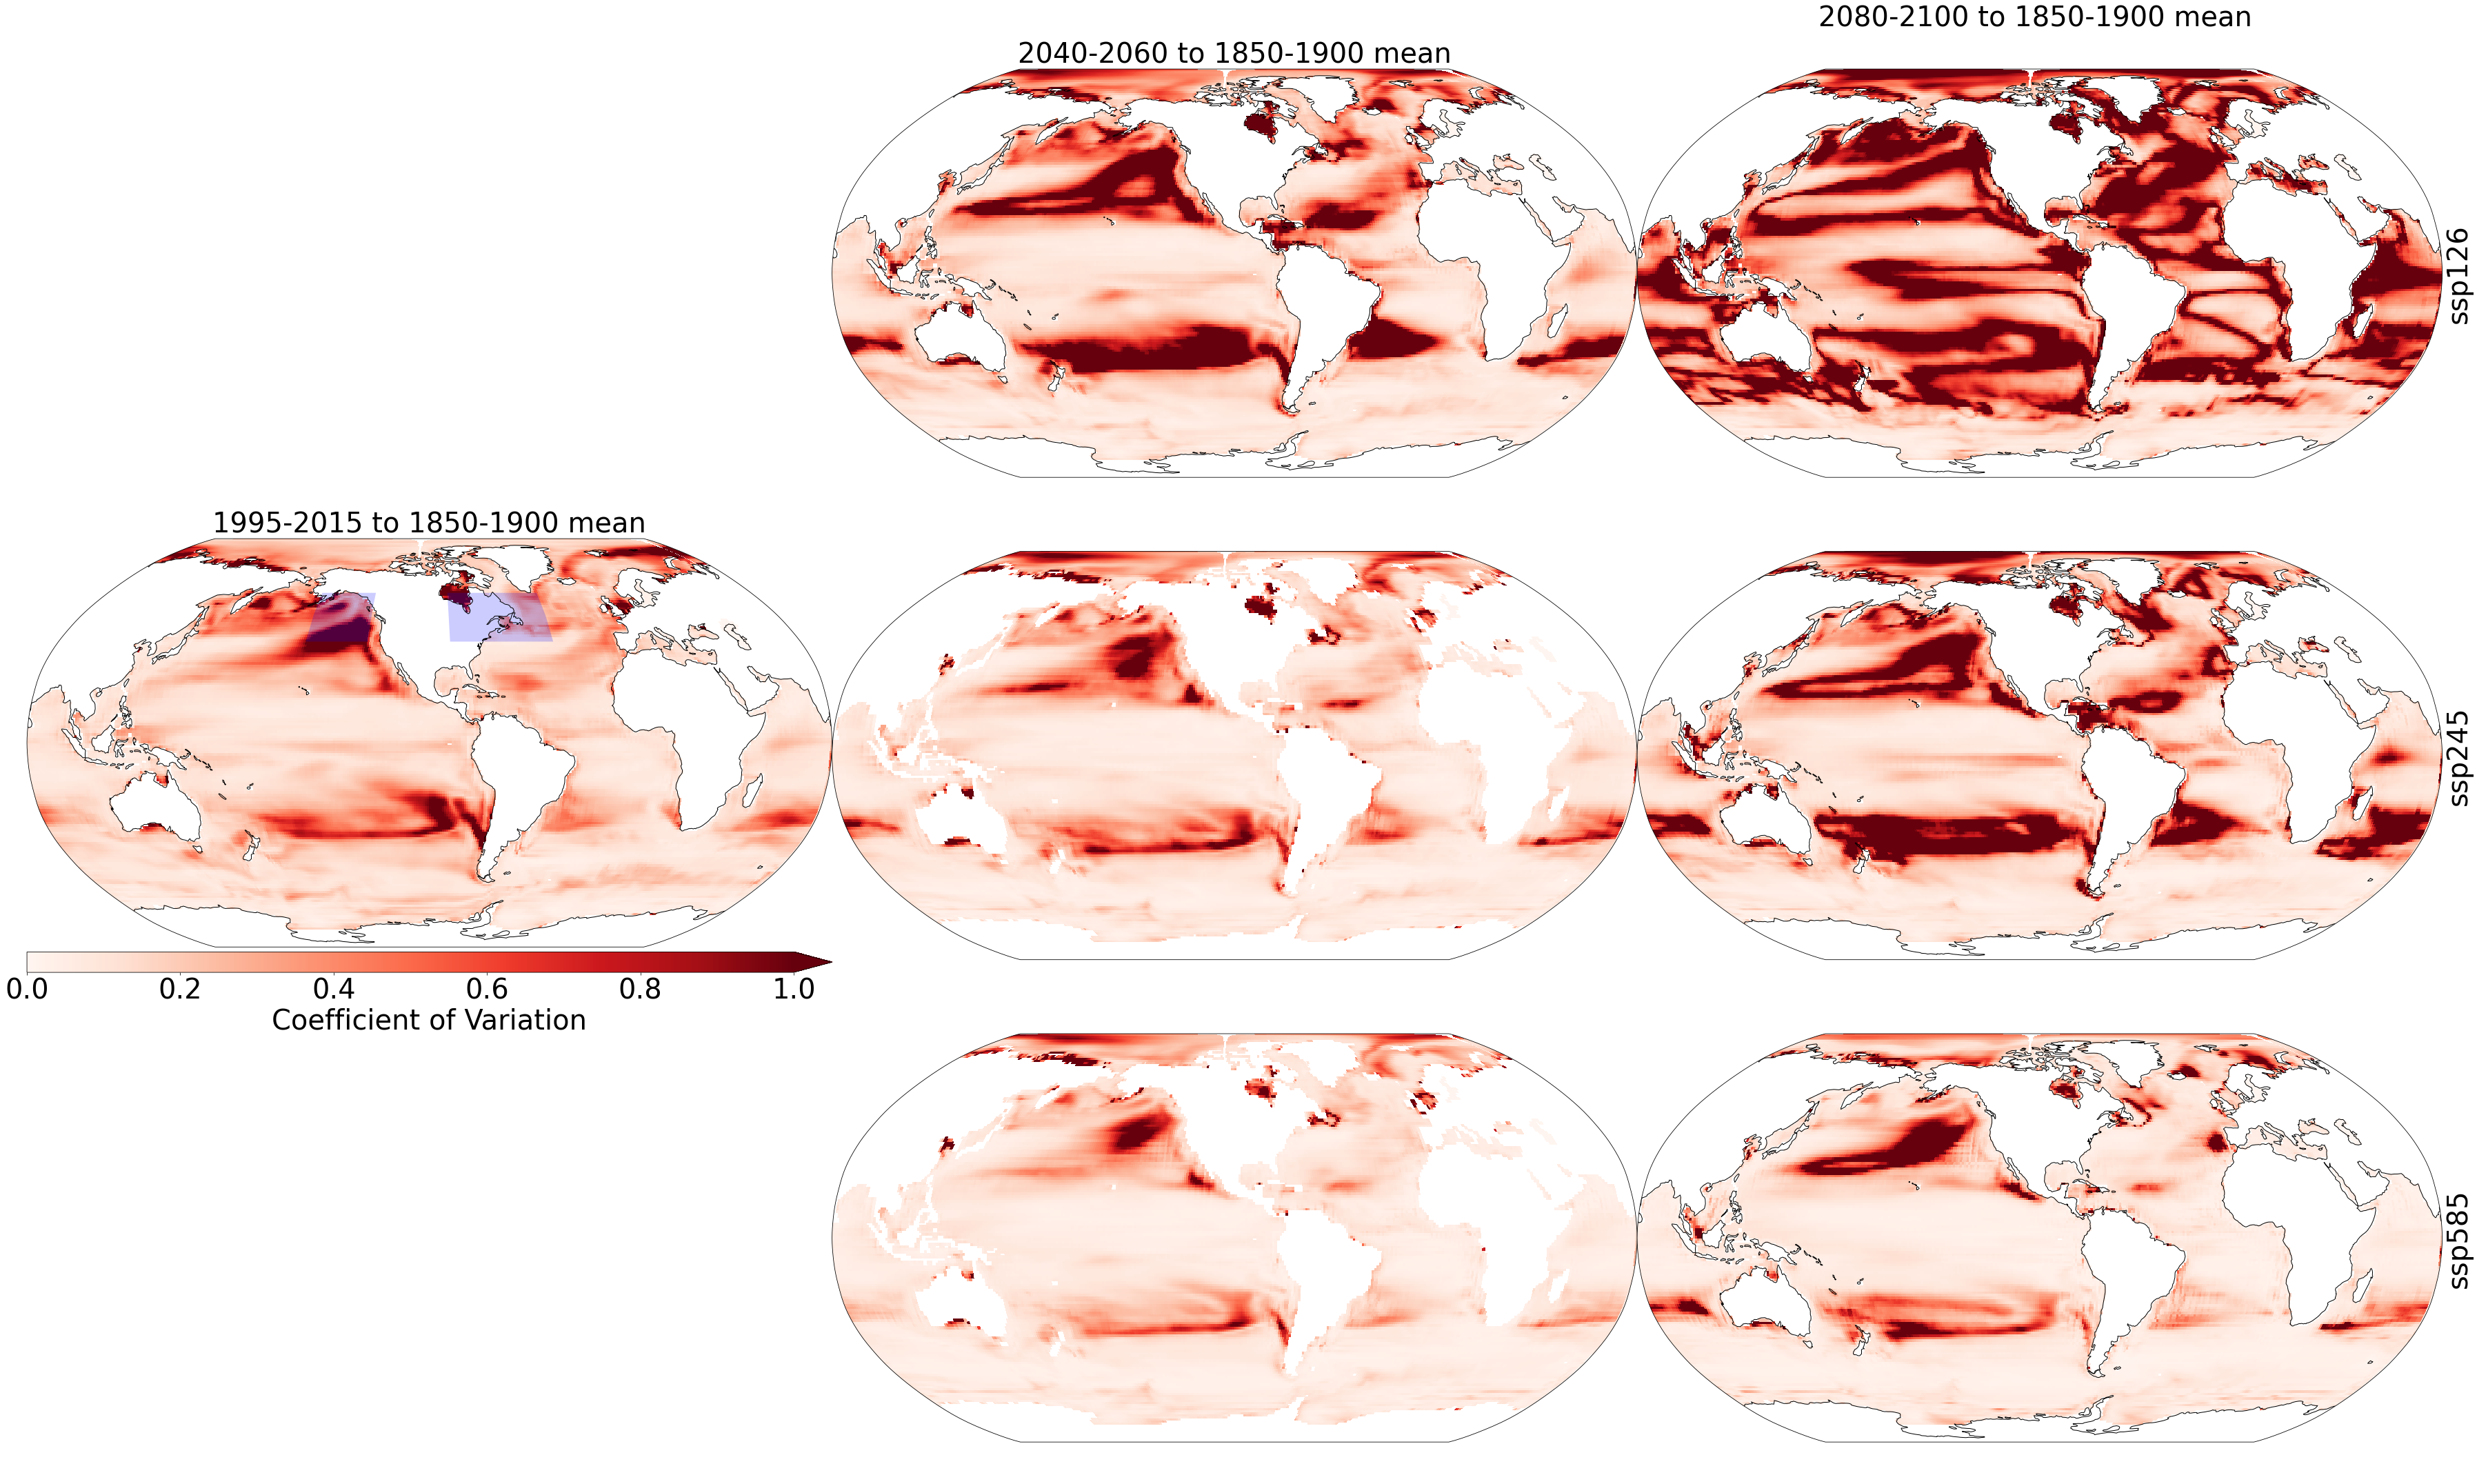

In [ ]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches

fig= plt.figure(figsize=(25,15))

ax = plt.subplot(1,1,1, projection=ccrs.Robinson(central_longitude=260))
ds = np.abs(IV/fgco2_anoms['historical'].mean(dim='source_id'))
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('Reds'),vmax = 1,vmin= 0,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
ax.set_title(f'1995-2015 to 1850-1900 mean', fontsize=40, pad = 0.5)
divider = make_axes_locatable(ax)
ax_cb = divider.append_axes('bottom', size="5%", pad=0.1, axes_class=plt.Axes)
cbar=plt.colorbar(cb, cax=ax_cb, orientation="horizontal", extend = 'max')
cbar.set_label( label=r'Coefficient of Variation', size=40)
cbar.ax.tick_params(labelsize=40)
cbar.ax.tick_params(labelsize=40)
ax.add_patch(mpatches.Rectangle(xy=[-160, 40], width=30, height=20,
                                    facecolor='none', edgecolor = 'k', linewidth = '3'
                                    ,transform=ccrs.PlateCarree()))
ax.add_patch(mpatches.Rectangle(xy=[-90, 40], width=50, height=20,
                                    facecolor='none', edgecolor = 'k', linewidth = '3'
                                    ,transform=ccrs.PlateCarree()))


In [ ]:
fig= plt.figure(figsize=(50,40))


ax = plt.subplot(4,3,2,projection=ccrs.Robinson(central_longitude=260))
ds = IV*kg_2_mol*sec_2_yr
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 2,vmin= -2,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
cr = corr(fgco2_anoms['historical'].mean(dim='source_id'), ds)
ax.set_title(f'Internal variation\n ({round(cr,2)})', fontsize=40, pad = 0.5)
divider = make_axes_locatable(ax)
ax_cb = divider.append_axes('bottom', size="10%", pad=0.1, axes_class=plt.Axes)
cbar=plt.colorbar(cb, cax=ax_cb, orientation="horizontal", extend = 'both')
cbar.set_label(label=r'Ocean carbon flux (mol m$^{-2}$ yr$^{-1}$)', size=40)
cbar.ax.tick_params(labelsize=40)




ax = plt.subplot(4,3,7,projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['historical'].std(dim = 'source_id')*kg_2_mol*sec_2_yr - IV*kg_2_mol*sec_2_yr
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 2,vmin= -2,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
cr = corr(fgco2_anoms['historical'].mean(dim='source_id'), ds)
ax.set_title(f'1995-2015 realtive to 1850-1900 \n ({round(cr,2)})', fontsize=40, pad = 0.5)






ax = plt.subplot(4,3,8,projection=ccrs.Robinson(central_longitude=260))
ds = ((fgco2_anoms['ssp126']['mid_century'].std(dim = 'source_id') + fgco2_anoms['ssp245']['mid_century'].std(dim = 'source_id') 
                        +fgco2_anoms['ssp585']['mid_century'].std(dim = 'source_id'))/3)*kg_2_mol*sec_2_yr - IV*kg_2_mol*sec_2_yr
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 2,vmin= -2,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
cr = corr(fgco2_anoms['historical'].mean(dim='source_id'), ds)
ax.set_title(f'2040-2060 realtive to 1850-1900  \n ({round(cr,2)})', fontsize=40, pad = 0.5)



ax = plt.subplot(4,3,9,projection=ccrs.Robinson(central_longitude=260))
ds = ((fgco2_anoms['ssp126']['late_century'].std(dim = 'source_id') + fgco2_anoms['ssp245']['late_century'].std(dim = 'source_id') 
                        +fgco2_anoms['ssp585']['late_century'].std(dim = 'source_id'))/3)*kg_2_mol*sec_2_yr - IV*kg_2_mol*sec_2_yr
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 2,vmin= -2,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
cr = corr(fgco2_anoms['historical'].mean(dim='source_id'), ds)
ax.set_title(f'2080-2100 realtive to 1850-1900 \n ({round(cr,2)})', fontsize=40, pad = 0.5)

ax2 = ax.twinx()
ax2.set_ylabel('Model Uncertainty',rotation=90, fontsize=40)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.get_yaxis().set_ticks([])




ax = plt.subplot(4,3,11,projection=ccrs.Robinson(central_longitude=260))
ds = E.std('scenario')*kg_2_mol*sec_2_yr- IV*kg_2_mol*sec_2_yr
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 2,vmin= -2,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
cr = corr(fgco2_anoms['historical'].mean(dim='source_id'), ds)
ax.set_title(f'({round(cr,2)})', fontsize=40, pad = 0.5)



ax = plt.subplot(4,3,12,projection=ccrs.Robinson(central_longitude=260))
ds = E2.std('scenario')*kg_2_mol*sec_2_yr- IV*kg_2_mol*sec_2_yr
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 2,vmin= -2,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
ax2 = ax.twinx()
ax2.set_ylabel('Scenario Uncertainty',rotation=90, fontsize=40)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.get_yaxis().set_ticks([])
cr = corr(fgco2_anoms['historical'].mean(dim='source_id'), ds)
ax.set_title(f'({round(cr,2)})', fontsize=40, pad = 0.5)



plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
#### 

In [ ]:
TV = {}
TV['ssp126'] = {}
TV['ssp245'] = {}
TV['ssp585'] = {}
TV['historical'] = 0.43
TV['ssp126']['mid_century'] = 0.45
TV['ssp126']['late_century'] = 0.14
TV['ssp245']['mid_century'] = 0.67
TV['ssp245']['late_century'] = 0.51
TV['ssp585']['mid_century'] = 0.96
TV['ssp585']['late_century'] = 1.22


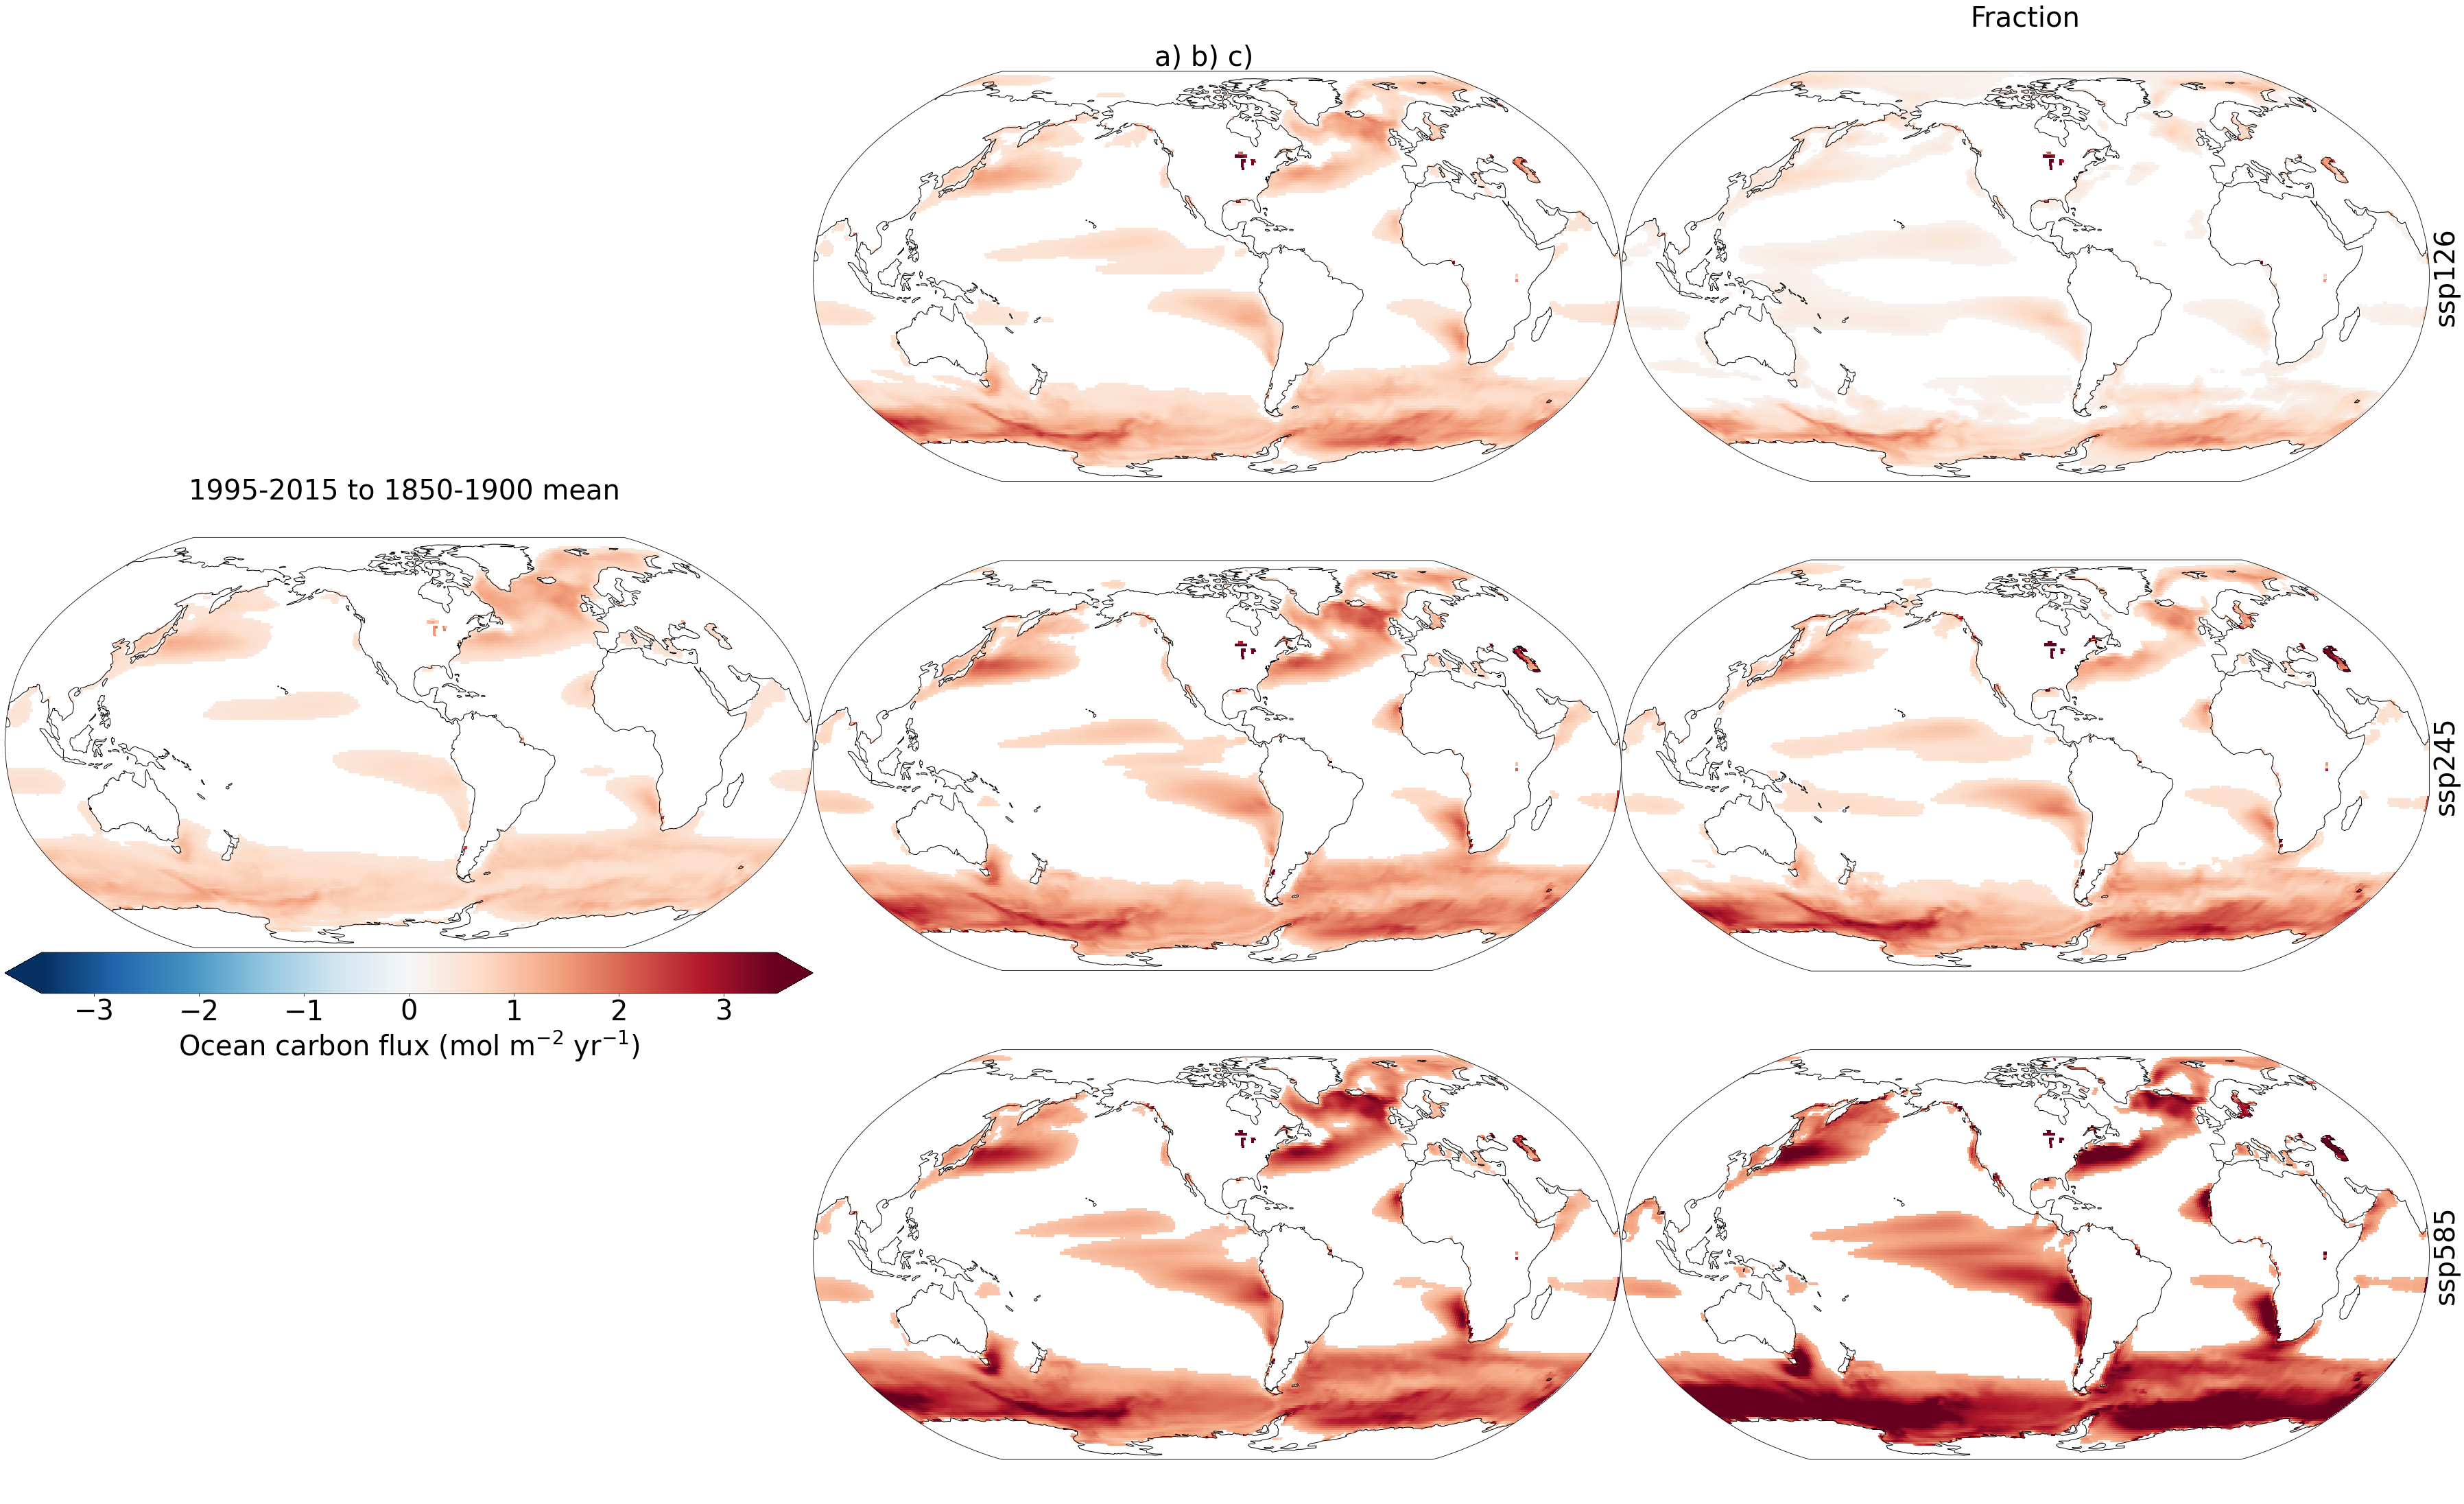

In [ ]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig= plt.figure(figsize=(50,30))

ax = plt.subplot(3,3,4, projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['historical'].mean(dim='source_id')*kg_2_mol*sec_2_yr
ds = ds.where(ds>TV['historical'])
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 3.5,vmin= -3.5,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
ax.set_title('1995-2015 to 1850-1900 mean \n   ', fontsize=40, pad = 0.5)
divider = make_axes_locatable(ax)
ax_cb = divider.append_axes('bottom', size="10%", pad=0.1, axes_class=plt.Axes)
cbar=plt.colorbar(cb, cax=ax_cb, orientation="horizontal", extend = 'both')
cbar.set_label(label=r'Ocean carbon flux (mol m$^{-2}$ yr$^{-1}$)', size=40)
cbar.ax.tick_params(labelsize=40)


i = 0
for exp, dic in fgco2_anoms.items():
  if exp == 'historical':
    pass
  else:
    ax = plt.subplot(3,3,i + 2, projection=ccrs.Robinson(central_longitude=260))
    ds = fgco2_anoms[exp]['mid_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
    ds = ds.where(ds>TV[exp]['mid_century'])
    cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 3.5,vmin= -3.5,rasterized=True,transform=ccrs.PlateCarree())
    _=ax.coastlines()

    ax = plt.subplot(3,3,i + 3, projection=ccrs.Robinson(central_longitude=260))
    ds = fgco2_anoms[exp]['late_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
    ds = ds.where(ds>TV[exp]['late_century'])
    cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 3.5,vmin= -3.5,rasterized=True,transform=ccrs.PlateCarree())
    _=ax.coastlines()
    ax2 = ax.twinx()
    ax2.set_ylabel(exp ,rotation=90, fontsize=40)
    ax2.spines["top"].set_visible(False)
    ax2.spines["right"].set_visible(False)
    ax2.spines["left"].set_visible(False)
    ax2.spines["bottom"].set_visible(False)
    ax2.get_yaxis().set_ticks([])
    
    i = i+3
    
plt.tight_layout()

ax = plt.subplot(3,3,2, projection=ccrs.Robinson(central_longitude=260))
ax.set_title(f'2040-2060 to 1850-1900 mean \n   ', fontsize=40, pad = 0.5)

ax = plt.subplot(3,3,3, projection=ccrs.Robinson(central_longitude=260))
ax.set_title(f'2080-2100 to 1850-1900 mean', fontsize=40, pad = 0.1)
ax2 = ax.twinx()
ax2.set_ylabel('ssp126' ,rotation=90, fontsize=40)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.get_yaxis().set_ticks([])

plt.subplots_adjust(wspace=0, hspace=0)

# CanESM5

In [ ]:
fgco2_anoms = {}

fgco2_anoms['historical'] = xr.load_dataset('fgco2_historical').fgco2

fgco2_anoms['ssp126'] = {}
fgco2_anoms['ssp126']['mid_century'] = xr.load_dataset('fgco2_ssp126_mid_century').fgco2
fgco2_anoms['ssp126']['late_century'] = xr.load_dataset('fgco2_ssp126_late_century').fgco2


fgco2_anoms['ssp245']= {}
fgco2_anoms['ssp245']['mid_century'] = xr.load_dataset('fgco2_ssp245_mid_century').fgco2
fgco2_anoms['ssp245']['late_century'] = xr.load_dataset('fgco2_ssp245_late_century').fgco2

fgco2_anoms['ssp585']= {}
fgco2_anoms['ssp585']['mid_century'] = xr.load_dataset('fgco2_ssp585_mid_century').fgco2
fgco2_anoms['ssp585']['late_century'] = xr.load_dataset('fgco2_ssp585_late_century').fgco2


CanESM5_anoms = {}

CanESM5_anoms['historical'] = xr.load_dataset('CanESM5_fgco2_historical_recent.nc').fgco2

CanESM5_anoms['ssp126'] = {}
CanESM5_anoms['ssp126']['mid_century'] = xr.load_dataset('CanESM5_fgco2_ssp126_mid_century.nc').fgco2
CanESM5_anoms['ssp126']['late_century'] = xr.load_dataset('CanESM5_fgco2_ssp126_late_century.nc').fgco2


CanESM5_anoms['ssp245']= {}
CanESM5_anoms['ssp245']['mid_century'] = xr.load_dataset('CanESM5_fgco2_ssp245_mid_century.nc').fgco2
CanESM5_anoms['ssp245']['late_century'] = xr.load_dataset('CanESM5_fgco2_ssp245_late_century.nc').fgco2

CanESM5_anoms['ssp585']= {}
CanESM5_anoms['ssp585']['mid_century'] = xr.load_dataset('CanESM5_fgco2_ssp585_mid_century.nc').fgco2
CanESM5_anoms['ssp585']['late_century'] = xr.load_dataset('CanESM5_fgco2_ssp585_late_century.nc').fgco2

In [ ]:
def addCyclicPoint(xarray_obj, dim, period=None):
    """
    Add a cyclic longitude point for data that doesn't wrap back to zero. Avoids seam at 0 or 180 longitude
    """
#     if period is None:
#         period = xarray_obj.sizes[dim] * xarray_obj.coords['lon'][:,2].diff(dim).values()
    first_point = xarray_obj.isel({dim: slice(1)})
    first_point.coords['lon'] = first_point.coords['lon'] + 360
                                    
    return xr.concat([xarray_obj, first_point], dim=dim)

In [ ]:
fgco2_anoms['historical'] =addCyclicPoint(fgco2_anoms['historical'], dim='x')
ref = fgco2_anoms['historical'].mean(['time', 'source_id'])
fgco2_anoms['ssp126']['mid_century'] = addCyclicPoint(fgco2_anoms['ssp126']['mid_century'], dim='x') - ref
fgco2_anoms['ssp126']['late_century'] = addCyclicPoint(fgco2_anoms['ssp126']['late_century'], dim='x') - ref
fgco2_anoms['ssp245']['mid_century'] = addCyclicPoint(fgco2_anoms['ssp245']['mid_century'], dim='x') - ref
fgco2_anoms['ssp245']['late_century'] = addCyclicPoint(fgco2_anoms['ssp245']['late_century'], dim='x') - ref
fgco2_anoms['ssp585']['mid_century'] = addCyclicPoint(fgco2_anoms['ssp585']['mid_century'], dim='x') - ref
fgco2_anoms['ssp585']['late_century'] = addCyclicPoint(fgco2_anoms['ssp585']['late_century'], dim='x') - ref



CanESM5_anoms['historical'] =addCyclicPoint(CanESM5_anoms['historical'], dim='x')
ref = CanESM5_anoms['historical'].mean(['time', 'source_id'])
CanESM5_anoms['ssp126']['mid_century'] = addCyclicPoint(CanESM5_anoms['ssp126']['mid_century'], dim='x')- ref
CanESM5_anoms['ssp126']['late_century'] = addCyclicPoint(CanESM5_anoms['ssp126']['late_century'], dim='x')- ref
CanESM5_anoms['ssp245']['mid_century'] = addCyclicPoint(CanESM5_anoms['ssp245']['mid_century'], dim='x')- ref
CanESM5_anoms['ssp245']['late_century'] = addCyclicPoint(CanESM5_anoms['ssp245']['late_century'], dim='x')- ref
CanESM5_anoms['ssp585']['mid_century'] = addCyclicPoint(CanESM5_anoms['ssp585']['mid_century'], dim='x')- ref
CanESM5_anoms['ssp585']['late_century'] = addCyclicPoint(CanESM5_anoms['ssp585']['late_century'], dim='x')- ref


fgco2_anoms['historical']['time'] = CanESM5_anoms['historical']['time']

fgco2_anoms['ssp126']['mid_century']['time'] = CanESM5_anoms['ssp126']['mid_century']['time']
fgco2_anoms['ssp126']['late_century']['time'] = CanESM5_anoms['ssp126']['late_century']['time']
fgco2_anoms['ssp245']['mid_century']['time'] = CanESM5_anoms['ssp126']['mid_century']['time']
fgco2_anoms['ssp245']['late_century']['time'] = CanESM5_anoms['ssp126']['late_century']['time']
fgco2_anoms['ssp585']['mid_century']['time'] = CanESM5_anoms['ssp126']['mid_century']['time']
fgco2_anoms['ssp585']['late_century']['time'] = CanESM5_anoms['ssp126']['late_century']['time']

In [ ]:
def corr(A,B):

    HIV = A.values.flatten()
    HMV = B.values.flatten()

    HMV = HMV[~np.isnan(HIV)]
    HIV = HIV[~np.isnan(HIV)]
    
    HIV = HIV[~np.isnan(HMV)]
    HMV = HMV[~np.isnan(HMV)]

    return np.corrcoef(HMV,HIV)[0,1]

In [ ]:
def internal_var(time, period):
    if time == 'historical':
        ds = CanESM5_anoms['historical']
        IV_cor = (ds[0:8,:].var('source_id') + ds[8:16,:].var('source_id') + ds[16:24,:].var('source_id') + ds[24:32,:].var('source_id') + ds[32:40,:].var('source_id') +ds[40:48,:].var('source_id') )/6
        return np.sqrt(fgco2_anoms['historical'].var(dim='source_id') - IV_cor)
    else:
        ds = CanESM5_anoms[time][period]
        IV_cor = (ds[0:8,:].var('source_id') + ds[8:16,:].var('source_id') + ds[16:24,:].var('source_id') + ds[24:32,:].var('source_id') + ds[32:40,:].var('source_id') +ds[40:48,:].var('source_id') )/6
        return np.sqrt(fgco2_anoms[time][period].var(dim='source_id') - IV_cor) 

In [ ]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig= plt.figure(figsize=(60,36))

ax = plt.subplot(3,3,1, projection=ccrs.Robinson(central_longitude=260))
ds = CanESM5_anoms['historical'].std('source_id').mean('time')
cb= ax.pcolormesh(ds.lon, ds.lat, ds*2*kg_2_mol*sec_2_yr, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 2,vmin= -2,rasterized=True,transform=ccrs.PlateCarree())
cr = corr(ref, ds)
ax.set_title(f'1995-2015 mean anomaly \n ({round(cr,2)})', fontsize=40, pad = 0.5)
_=ax.coastlines()


ax = plt.subplot(3,3,2, projection=ccrs.Robinson(central_longitude=260))
ds = ((CanESM5_anoms['ssp126']['mid_century'].std('source_id') + CanESM5_anoms['ssp245']['mid_century'].std('source_id') + CanESM5_anoms['ssp585']['mid_century'].std('source_id'))/3).mean('time')
cb= ax.pcolormesh(ds.lon, ds.lat, ds*2*kg_2_mol*sec_2_yr, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 2,vmin= -2,rasterized=True,transform=ccrs.PlateCarree())
cr = corr(ref, ds)
ax.set_title(f'2040-2060 mean anomaly \n ({round(cr,2)})', fontsize=40, pad = 0.5)
_=ax.coastlines()


ax = plt.subplot(3,3,3, projection=ccrs.Robinson(central_longitude=260))
ds = ((CanESM5_anoms['ssp126']['late_century'].std('source_id') + CanESM5_anoms['ssp245']['late_century'].std('source_id') + CanESM5_anoms['ssp585']['late_century'].std('source_id'))/3).mean('time')
cb= ax.pcolormesh(ds.lon, ds.lat, ds*2*kg_2_mol*sec_2_yr, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 2,vmin= -2,rasterized=True,transform=ccrs.PlateCarree())
cr = corr(ref, ds)
ax.set_title(f'2080-2100 mean anomaly \n ({round(cr,2)})', fontsize=40, pad = 0.5)
_=ax.coastlines()
ax2 = ax.twinx()
ax2.set_ylabel('Internal Uncertainty',rotation=90, fontsize=40)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.get_yaxis().set_ticks([])



ax = plt.subplot(3,3,4, projection=ccrs.Robinson(central_longitude=260))
ds = internal_var('historical','an').mean('time')
cb= ax.pcolormesh(ds.lon, ds.lat, ds*2*kg_2_mol*sec_2_yr, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 2,vmin= -2,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
cr = corr(ref, ds)
divider = make_axes_locatable(ax)
ax_cb = divider.append_axes('bottom', size="10%", pad=0.1, axes_class=plt.Axes)
ax.set_title(f'({round(cr,2)})', fontsize=40, pad = 0.5)
cbar=plt.colorbar(cb, cax=ax_cb, orientation="horizontal", extend = 'both')
cbar.set_label(label=r'Uncertainty (mol m$^{-2}$ yr$^{-1}$)', size=40)
cbar.ax.tick_params(labelsize=40)


ax = plt.subplot(3,3,5, projection=ccrs.Robinson(central_longitude=260))
ds = ((internal_var('ssp126','mid_century') + internal_var('ssp245','mid_century')+ internal_var('ssp585','mid_century'))/3).mean('time')
cb= ax.pcolormesh(ds.lon, ds.lat, ds*2*kg_2_mol*sec_2_yr, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 2,vmin= -2,rasterized=True,transform=ccrs.PlateCarree())
cr = corr(ref, ds)
ax.set_title(f'({round(cr,2)})', fontsize=40, pad = 0.5)
_=ax.coastlines()


ax = plt.subplot(3,3,6, projection=ccrs.Robinson(central_longitude=260))
ds = ((internal_var('ssp126','late_century') + internal_var('ssp245','late_century')+ internal_var('ssp585','late_century'))/3).mean('time')
cb= ax.pcolormesh(ds.lon, ds.lat, ds*2*kg_2_mol*sec_2_yr, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 2,vmin= -2,rasterized=True,transform=ccrs.PlateCarree())
cr = corr(ref, ds)
ax.set_title(f'({round(cr,2)})', fontsize=40, pad = 0.5)
_=ax.coastlines()
ax2 = ax.twinx()
ax2.set_ylabel('Model Uncertainty',rotation=90, fontsize=40)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.get_yaxis().set_ticks([])







##
ax = plt.subplot(3,3,8, projection=ccrs.Robinson(central_longitude=260))
ds = E.std('scenario').mean('time')
cb= ax.pcolormesh(ds.lon, ds.lat, ds*2*kg_2_mol*sec_2_yr, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 2,vmin= -2,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
cr = corr(ref, ds)
ax.set_title(f'({round(cr,2)})', fontsize=40)


ax = plt.subplot(3,3,9,projection=ccrs.Robinson(central_longitude=260))
ds = E2.std('scenario').mean('time')
cb= ax.pcolormesh(ds.lon, ds.lat, ds*2*kg_2_mol*sec_2_yr, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 2,vmin= -2,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
ax2 = ax.twinx()
ax2.set_ylabel('Scenario Uncertainty',rotation=90, fontsize=40)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.get_yaxis().set_ticks([])
cr = corr(ref, ds)
ax.set_title(f'({round(cr,2)})', fontsize=40)





plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)
#### 

In [ ]:
E = xr.concat([fgco2_anoms['ssp126']['mid_century'].mean(dim = 'source_id'),fgco2_anoms['ssp245']['mid_century'].mean(dim = 'source_id'),fgco2_anoms['ssp585']['mid_century'].mean(dim = 'source_id')], dim = 'scenario')
E2 = xr.concat([fgco2_anoms['ssp126']['late_century'].mean(dim = 'source_id'),fgco2_anoms['ssp245']['late_century'].mean(dim = 'source_id'),fgco2_anoms['ssp585']['late_century'].mean(dim = 'source_id')], dim = 'scenario')
          


In [ ]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig= plt.figure(figsize=(60,36))



ax = plt.subplot(4,3,4, projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['historical'].std(dim='source_id').mean('time') - internal_var(CanESM5_anoms['historical']).mean('time')

cb= ax.pcolormesh(ds.lon, ds.lat, ds*2*kg_2_mol*sec_2_yr, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 2,vmin= -2,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
cr = corr(fgco2_anoms['historical'].mean(dim='source_id').mean('time'), ds)
ax.set_title(f'1995-2015 to 1850-1900 mean \n ({round(cr,2)})', fontsize=40, pad = 0.5)
divider = make_axes_locatable(ax)
ax_cb = divider.append_axes('bottom', size="10%", pad=0.1, axes_class=plt.Axes)
cbar=plt.colorbar(cb, cax=ax_cb, orientation="horizontal", extend = 'both')
cbar.set_label(label=r'Uncertainty (mol m$^{-2}$ yr$^{-1}$)', size=40)
cbar.ax.tick_params(labelsize=40)


ax = plt.subplot(4,3,2, projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp126']['mid_century'].std(dim='source_id').mean('time') - internal_var(CanESM5_anoms['ssp126']['mid_century']).mean('time')

cb= ax.pcolormesh(ds.lon, ds.lat, ds*2*kg_2_mol*sec_2_yr, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 2,vmin= -2,rasterized=True,transform=ccrs.PlateCarree())
cr = corr(fgco2_anoms['historical'].mean(dim='source_id').mean('time'), ds)
ax.set_title(f'2040-2060 to 1850-1900 mean \n ({round(cr,2)})', fontsize=40, pad = 0.5)
_=ax.coastlines()
divider = make_axes_locatable(ax)
# ax_cb = divider.append_axes('bottom', size="3%", pad=0.1, axes_class=plt.Axes)
# _=plt.colorbar(cb, cax=ax_cb, orientation="horizontal", label=r'Ocean carbon flux (mol m$^{-2}$ yr$^{-1}$)')



ax = plt.subplot(4,3,3, projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp126']['late_century'].std(dim='source_id').mean('time')- internal_var(CanESM5_anoms['ssp126']['late_century']).mean('time')

cr = corr(fgco2_anoms['historical'].mean(dim='source_id').mean('time'), ds)
cb= ax.pcolormesh(ds.lon, ds.lat, ds*2*kg_2_mol*sec_2_yr, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 2,vmin= -2,rasterized=True,transform=ccrs.PlateCarree())
ax.set_title(f'2080-20100 to 1850-1900 mean \n ({round(cr,2)})', fontsize=40, pad = 0.5)
_=ax.coastlines()
divider = make_axes_locatable(ax)
# ax_cb = divider.append_axes('bottom', size="3%", pad=0.1, axes_class=plt.Axes)
# _=plt.colorbar(cb, cax=ax_cb, orientation="horizontal", label=r'Ocean carbon flux (mol m$^{-2}$ yr$^{-1}$)')
ax2 = ax.twinx()
ax2.set_ylabel('ssp126',rotation=90, fontsize=40)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.get_yaxis().set_ticks([])

ax = plt.subplot(4,3,5, projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp245']['mid_century'].std(dim='source_id').mean('time')-internal_var(CanESM5_anoms['ssp245']['mid_century']).mean('time')

cb= ax.pcolormesh(ds.lon, ds.lat, ds*2*kg_2_mol*sec_2_yr, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 2,vmin= -2,rasterized=True,transform=ccrs.PlateCarree())
divider = make_axes_locatable(ax)
cr = corr(fgco2_anoms['historical'].mean(dim='source_id').mean('time'), ds)
ax.set_title(f'({round(cr,2)})', fontsize=40, pad = 0.5)
# ax_cb = divider.append_axes('bottom', size="3%", pad=0.1, axes_class=plt.Axes)
# _=plt.colorbar(cb, cax=ax_cb, orientation="horizontal", label=r'Ocean carbon flux (mol m$^{-2}$ yr$^{-1}$)')
_=ax.coastlines()

ax = plt.subplot(4,3,6, projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp245']['late_century'].std(dim='source_id').mean('time') - internal_var(CanESM5_anoms['ssp245']['late_century']).mean('time')
cb= ax.pcolormesh(ds.lon, ds.lat, ds*2*kg_2_mol*sec_2_yr, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 2,vmin= -2,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
cr = corr(fgco2_anoms['historical'].mean(dim='source_id').mean('time'), ds)
ax.set_title(f' ({round(cr,2)})', fontsize=40, pad = 0.5)
divider = make_axes_locatable(ax)
# ax_cb = divider.append_axes('bottom', size="3%", pad=0.1, axes_class=plt.Axes)
# _=plt.colorbar(cb, cax=ax_cb, orientation="horizontal", label=r'Ocean carbon flux (mol m$^{-2}$ yr$^{-1}$)')
ax2 = ax.twinx()
ax2.set_ylabel('Model Uncertainty \n ssp245',rotation=90, fontsize=40)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.get_yaxis().set_ticks([])


ax = plt.subplot(4,3,8, projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp585']['mid_century'].std(dim='source_id').mean('time') - internal_var(CanESM5_anoms['ssp585']['mid_century']).mean('time')

cb= ax.pcolormesh(ds.lon, ds.lat, ds*2*kg_2_mol*sec_2_yr, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 2,vmin= -2,rasterized=True,transform=ccrs.PlateCarree())
divider = make_axes_locatable(ax)
cr = corr(fgco2_anoms['historical'].mean(dim='source_id').mean('time'), ds)
ax.set_title(f' ({round(cr,2)})', fontsize=40, pad = 0.5)
# ax_cb = divider.append_axes('bottom', size="3%", pad=0.1, axes_class=plt.Axes)
# _=plt.colorbar(cb, cax=ax_cb, orientation="horizontal", label=r'Ocean carbon flux (mol m$^{-2}$ yr$^{-1}$)')
_=ax.coastlines()

ax = plt.subplot(4,3,9, projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp585']['late_century'].std(dim='source_id').mean('time') - internal_var(CanESM5_anoms['ssp585']['late_century']).mean('time')

cb= ax.pcolormesh(ds.lon, ds.lat, ds*2*kg_2_mol*sec_2_yr, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 2,vmin= -2,rasterized=True,transform=ccrs.PlateCarree())
divider = make_axes_locatable(ax)
cr = corr(fgco2_anoms['historical'].mean(dim='source_id').mean('time'), ds)
ax.set_title(f' ({round(cr,2)})', fontsize=40, pad = 0.5)
# ax_cb = divider.append_axes('bottom', size="3%", pad=0.1, axes_class=plt.Axes)
# _=plt.colorbar(cb, cax=ax_cb, orientation="horizontal", label=r'Ocean carbon flux (mol m$^{-2}$ yr$^{-1}$)')
_=ax.coastlines()
ax2 = ax.twinx()
ax2.set_ylabel('ssp585',rotation=90, fontsize=40)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.get_yaxis().set_ticks([])


##
ax = plt.subplot(4,3,11, projection=ccrs.Robinson(central_longitude=260))
ds = E.std('scenario').mean('time')
cb= ax.pcolormesh(ds.lon, ds.lat, ds*2*kg_2_mol*sec_2_yr, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 2,vmin= -2,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
cr = corr(fgco2_anoms['historical'].mean(dim='source_id').mean('time'), ds)
ax.set_title(f' ({round(cr,2)})', fontsize=40)


ax = plt.subplot(4,3,12,projection=ccrs.Robinson(central_longitude=260))
ds = E2.std('scenario').mean('time')
cb= ax.pcolormesh(ds.lon, ds.lat, ds*2*kg_2_mol*sec_2_yr, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 2,vmin= -2,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
ax2 = ax.twinx()
ax2.set_ylabel('Scenario Uncertainty',rotation=90, fontsize=40)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.get_yaxis().set_ticks([])
cr = corr(fgco2_anoms['historical'].mean(dim='source_id').mean('time'), ds)
ax.set_title(f'({round(cr,2)})', fontsize=40)





plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)
#### 

In [ ]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches

fig= plt.figure(figsize=(20,10))

ax = plt.subplot(1,1,1, projection=ccrs.Robinson(central_longitude=260))
ds = np.abs(internal_var(CanESM5_anoms['historical']).mean('time')/fgco2_anoms['historical'].mean(dim='source_id').mean('time'))
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('Reds'),vmax = 1,vmin= 0,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
ax.set_title(f'1995-2015 to 1850-1900 mean', fontsize=40, pad = 0.5)
divider = make_axes_locatable(ax)
ax_cb = divider.append_axes('bottom', size="5%", pad=0.1, axes_class=plt.Axes)
cbar=plt.colorbar(cb, cax=ax_cb, orientation="horizontal", extend = 'max')
cbar.set_label( label=r'Coefficient of Variation', size=40)
cbar.ax.tick_params(labelsize=40)
cbar.ax.tick_params(labelsize=40)
ax.add_patch(mpatches.Rectangle(xy=[-160, 40], width=30, height=20,
                                    facecolor='none', edgecolor = 'k', linewidth = '3'
                                    ,transform=ccrs.PlateCarree()))
ax.add_patch(mpatches.Rectangle(xy=[-70, 40], width=30, height=20,
                                    facecolor='none', edgecolor = 'k', linewidth = '3'
                                    ,transform=ccrs.PlateCarree()))


In [ ]:
# ! wget https://www.nodc.noaa.gov/archive/arc0105/0160558/3.3/data/0-data/spco2_1982-2015_MPI_SOM-FFN_v2016.nc
land = xr.open_dataset('spco2_1982-2015_MPI_SOM-FFN_v2016.nc', drop_variables= 'date').fgco2_smoothed.sel(time = slice('1995', '2015')).resample(time = 'Y').mean('time')
# land = land.rename( {'lat' : 'y', 'lon' : 'x'})
land = addCyclicPoint(land, dim='lon')

In [ ]:
land = land.rename({'lat' : 'y', 'lon':'x'})


lat  = xr.DataArray(fgco2_anoms['historical']['lat'].values[:,0], dims = ['y'])
lon  = xr.DataArray(fgco2_anoms['historical']['lon'].values[0,:], dims = ['x'])

fgco2_anoms['historical']['lat'] = lat
fgco2_anoms['historical']['lon'] = lon

fgco2_anoms['historical'] = fgco2_anoms['historical'].rename({'lat' : 'y', 'lon':'x'})

fgco2_anoms['historical'].mean(dim='source_id')*kg_2_mol*sec_2_yr - land.mean('time')*-1

In [ ]:
ref = xr.load_dataset('fgco2_anoms_historical').fgco2
ref = addCyclicPoint(ref, dim='x').mean(['time','source_id'])

In [ ]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig= plt.figure(figsize=(50,30))


ax = plt.subplot(3,3,4, projection=ccrs.Robinson(central_longitude=260))
ds = land.mean('time')*-1

cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
cr = corr(ref, ds)

ax.text(-0.05, 0.5, ' Landschützer et al. (2016)', horizontalalignment='center', 
     verticalalignment='center', transform=ax.transAxes, size=40, rotation = 90)


ax = plt.subplot(3,3,1, projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['historical'].mean(dim='source_id')*kg_2_mol*sec_2_yr
n = fgco2_anoms['historical'].source_id.shape[0]
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
ax.set_title(f'1995-2015 mean \n     ', fontsize=40, pad = 0.5)
ax.text(-0.05, 0.5, ' CMIP6 multi-model mean', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, size=40, rotation = 90)

ax = plt.subplot(3,3,7, projection=ccrs.Robinson(central_longitude=260))
ds = ref*kg_2_mol*sec_2_yr
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
divider = make_axes_locatable(ax)
ax_cb = divider.append_axes('bottom', size="10%", pad=0.1, axes_class=plt.Axes)
cbar=plt.colorbar(cb, cax=ax_cb, orientation="horizontal", extend = 'both')
cbar.set_label(label=r'Ocean carbon flux (mol m$^{-2}$ yr$^{-1}$)', size=40)
cbar.ax.tick_params(labelsize=40)
cr = corr(ref, ref)
ax.set_title(f'({round(cr,2)})', fontsize=40, pad = 0.5)
ax.text(-0.07, 0.5, ' Anomaly relative to \n 1850-1900 mean', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, size=40, rotation = 90)


ax = plt.subplot(3,3,2, projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp126']['mid_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
n = fgco2_anoms['ssp126']['mid_century'].source_id.shape[0]
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
cr = corr(np.abs(fgco2_anoms['ssp126']['mid_century'].mean(dim='source_id')), ref)
ax.set_title(f'2040-2060 mean anomaly \n ({round(cr,2)})', fontsize=40, pad = 0.5)
_=ax.coastlines()


ax = plt.subplot(3,3,3, projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp126']['late_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
n = fgco2_anoms['ssp126']['late_century'].source_id.shape[0]
cr = corr(np.abs(fgco2_anoms['ssp126']['late_century'].mean(dim='source_id')), ref)
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
ax.set_title(f'2040-2060 mean anomaly \n ({round(cr,2)})', fontsize=40, pad = 0.5)
_=ax.coastlines()
divider = make_axes_locatable(ax)
ax2 = ax.twinx()
ax2.set_ylabel('ssp126',rotation=90, fontsize=40)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.get_yaxis().set_ticks([])


ax = plt.subplot(3,3,5, projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp245']['mid_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
n = fgco2_anoms['ssp245']['mid_century'].source_id.shape[0]
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
divider = make_axes_locatable(ax)
cr = corr(np.abs(fgco2_anoms['ssp245']['mid_century'].mean(dim='source_id')), ref)
ax.set_title(f'({round(cr,2)})', fontsize=40, pad = 0.5)
_=ax.coastlines()

ax = plt.subplot(3,3,6, projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp245']['late_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
n = fgco2_anoms['ssp245']['late_century'].source_id.shape[0]
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
cr = corr(np.abs(fgco2_anoms['ssp245']['late_century'].mean(dim='source_id')), ref)
ax.set_title(f'({round(cr,2)})', fontsize=40, pad = 0.5)
divider = make_axes_locatable(ax)
ax2 = ax.twinx()
ax2.set_ylabel('ssp245',rotation=90, fontsize=40)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.get_yaxis().set_ticks([])


ax = plt.subplot(3,3,8, projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp585']['mid_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
n = fgco2_anoms['ssp585']['mid_century'].source_id.shape[0]
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
divider = make_axes_locatable(ax)
cr = corr(np.abs(fgco2_anoms['ssp585']['mid_century'].mean(dim='source_id')), ref)
ax.set_title(f' ({round(cr,2)})', fontsize=40, pad = 0.5)
_=ax.coastlines()

ax = plt.subplot(3,3,9, projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp585']['late_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
n = fgco2_anoms['ssp585']['late_century'].source_id.shape[0]
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
divider = make_axes_locatable(ax)
cr = corr(np.abs(fgco2_anoms['ssp585']['late_century'].mean(dim='source_id')), ref)
ax.set_title(f'({round(cr,2)})', fontsize=40, pad = 0.5)
_=ax.coastlines()
ax2 = ax.twinx()
ax2.set_ylabel('ssp585',rotation=90, fontsize=40)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.get_yaxis().set_ticks([])

plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1)
#### 

In [ ]:
ax.add_feature(cartopy.feature.LAND, zorder=500, edgecolor='k', facecolor = 'gray')

In [ ]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


fig = plt.figure(figsize=(40,30), constrained_layout=True)
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1.5])

gs1 = gs[0].subgridspec(3, 1)


ax = fig.add_subplot(gs1[0], projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['historical'].mean(dim='source_id')*kg_2_mol*sec_2_yr
cb= ax.pcolormesh(ds.x, ds.y, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
ax.set_title(f'1995-2015 mean \n ', fontsize=40, pad = 0.5, weight='bold')

ax.text(0.5, -0.1, ' CMIP6 multi-model mean', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, size=40)


ax = fig.add_subplot(gs1[1], projection=ccrs.Robinson(central_longitude=260))
ds = land.mean('time')*-1
cb= ax.pcolormesh(ds.x, ds.y, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
ax.text(0.5, -0.1, ' Landschützer et al. (2016)', horizontalalignment='center', 
     verticalalignment='center', transform=ax.transAxes, size=40)


ax = fig.add_subplot(gs1[2], projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['historical'].mean(dim='source_id')*kg_2_mol*sec_2_yr - land.mean('time')*-1
cb= ax.pcolormesh(ds.x, ds.y, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
ax.text(0.5, -0.1,  ' Model - Observation', horizontalalignment='center', 
     verticalalignment='center', transform=ax.transAxes, size=40)






gs1 = gs[1].subgridspec(2, 1,  height_ratios=[1, 2])
ax = fig.add_subplot(gs1[0], projection=ccrs.Robinson(central_longitude=260))
cr = corr(ref, ref)
ds = ref*kg_2_mol*sec_2_yr
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
ax.set_title(f'Anomaly relative to \n 1850-1900 mean \n ({round(cr,2)})', fontsize=40, pad = 0.5 , weight='bold')

divider = make_axes_locatable(ax)
ax_cb = divider.append_axes('bottom', size="10%", pad=0.1, axes_class=plt.Axes)
cbar=plt.colorbar(cb, cax=ax_cb,  orientation="horizontal", extend = 'both')
cbar.set_label(label=r'Ocean carbon flux (mol m$^{-2}$ yr$^{-1}$)', size=40)
cbar.ax.tick_params(labelsize=40)


gs01 = gs1[1].subgridspec(3, 2)
ax = fig.add_subplot(gs01[0,0], projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp126']['mid_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
n = fgco2_anoms['ssp126']['mid_century'].source_id.shape[0]
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
cr = corr(np.abs(fgco2_anoms['ssp126']['mid_century'].mean(dim='source_id')), ref)
ax.set_title(f' \n ({round(cr,2)})', fontsize=40, pad = 0.5)
_=ax.coastlines()


ax = fig.add_subplot(gs01[0,1], projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp126']['late_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
cr = corr(np.abs(fgco2_anoms['ssp126']['late_century'].mean(dim='source_id')), ref)
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
ax.set_title(f' \n ({round(cr,2)})', fontsize=40, pad = 0.5)

_=ax.coastlines()
divider = make_axes_locatable(ax)
ax2 = ax.twinx()
ax2.set_ylabel('ssp126',rotation=90, fontsize=40)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.get_yaxis().set_ticks([])


ax = fig.add_subplot(gs01[1,0], projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp126']['late_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
ds = fgco2_anoms['ssp245']['mid_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
n = fgco2_anoms['ssp245']['mid_century'].source_id.shape[0]
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
divider = make_axes_locatable(ax)
cr = corr(np.abs(fgco2_anoms['ssp245']['mid_century'].mean(dim='source_id')), ref)
ax.set_title(f'({round(cr,2)})', fontsize=40, pad = 0.5)
_=ax.coastlines()

ax = fig.add_subplot(gs01[1,1], projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp126']['late_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
ds = fgco2_anoms['ssp245']['late_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
n = fgco2_anoms['ssp245']['late_century'].source_id.shape[0]
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
_=ax.coastlines()
cr = corr(np.abs(fgco2_anoms['ssp245']['late_century'].mean(dim='source_id')), ref)
ax.set_title(f'({round(cr,2)})', fontsize=40, pad = 0.5)
divider = make_axes_locatable(ax)
ax2 = ax.twinx()
ax2.set_ylabel('ssp245',rotation=90, fontsize=40)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.get_yaxis().set_ticks([])


ax = fig.add_subplot(gs01[2,0], projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp126']['late_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
ds = fgco2_anoms['ssp585']['mid_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
n = fgco2_anoms['ssp585']['mid_century'].source_id.shape[0]
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
divider = make_axes_locatable(ax)
cr = corr(np.abs(fgco2_anoms['ssp585']['mid_century'].mean(dim='source_id')), ref)
ax.set_title(f' ({round(cr,2)})', fontsize=40, pad = 0.5)
_=ax.coastlines()
ax.text(0.5, -0.3,  r'2040-2060 mean', horizontalalignment='center', 
     verticalalignment='center', transform=ax.transAxes, size=40, weight='bold')

ax = fig.add_subplot(gs01[2,1], projection=ccrs.Robinson(central_longitude=260))
ds = fgco2_anoms['ssp126']['late_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
ds = fgco2_anoms['ssp585']['late_century'].mean(dim='source_id')*kg_2_mol*sec_2_yr
n = fgco2_anoms['ssp585']['late_century'].source_id.shape[0]
cb= ax.pcolormesh(ds.lon, ds.lat, ds, cmap=plt.cm.get_cmap('RdBu_r'),vmax = 4,vmin= -4,rasterized=True,transform=ccrs.PlateCarree())
divider = make_axes_locatable(ax)
cr = corr(np.abs(fgco2_anoms['ssp585']['late_century'].mean(dim='source_id')), ref)
ax.set_title(f'({round(cr,2)})', fontsize=40, pad = 0.5)
_=ax.coastlines()
ax2 = ax.twinx()
ax2.set_ylabel('ssp585',rotation=90, fontsize=40)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.get_yaxis().set_ticks([])
ax.text(0.5, -0.3,  r'2080-2100 mean', horizontalalignment='center', 
     verticalalignment='center', transform=ax.transAxes, size=40, weight='bold')


# plt.tight_layout()
# plt.subplots_adjust(wspace=0.1, hspace=0.1)
# #### 